# Different SVM Models on Optdigits Data Set

In this project, we will try train some <code>SVM (Support Vector Machine)</code> models. For this, we will use different kernels.

After these steps, we will see that which one is the best option for us. We will have an opportunity to use it in the future after this project.

Our dataset is called <code>optdigits</code>, and it has some binary values that tries to show a digit picture. Digits are from 0 to 9. We have a train and test data sets that carries these binary number's digit data.

We have 65 columns in both of our data sets. Last column is our target variable and it carries the number that row is trying to show.

At the beginning, let's import the data set with <code>Pandas</code>.

In [2]:
# import the data sets
import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/dotnet/machinelearning-samples/main/datasets/optdigits-train.csv', header=None)
df_test = pd.read_csv('https://raw.githubusercontent.com/dotnet/machinelearning-samples/main/datasets/optdigits-test.csv', header=None)

print('Train and test data sets are imported successfully!')

Train and test data sets are imported successfully!


Let's see first 5 columns of train and test data sets.

In [2]:
# first 5 columns of the train data set
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [3]:
# first 5 columns of the test data set
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


As you can see, there are lots of numerical values in these data sets. We can gather some more informations about these data sets. This process will give us some ideas before the <code>data preprocessing</code>. So, we can learn what can we do with this data set. Let's start.

At first, we gather some datas with <code>.describe()</code>.

In [4]:
# some useful informations about the train data set
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [5]:
# some useful informations about the test data set
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


At this point, we have some useful informations about our data set. You can see count, mean, std, min, etc of every column in both of the data sets. This informations can be helpful in many cases of the projects.

Here, we will touch upon a new point here. It is important to know about how many columns and rows we have. For this, we will use <code>.shape</code> here.

In [6]:
# row-columns informations of the data sets
print('For the train data set, we have {} -> (rows, columns),\nFor the test data set, we have {} -> (rows, columns).'.format(df_train.shape, df_test.shape))

For the train data set, we have (3823, 65) -> (rows, columns),
For the test data set, we have (1797, 65) -> (rows, columns).


As you can see here, we have so many columns and rows here. We will learn from train data set, and use these informations on the test data set.

For now, we are in the last step. We will search if there is any null value in both of these data sets. If null values are exist in data sets, we will use some preprocessing methods for them. Because we do not want any null values in our data sets.

If null values are not exist, so we can continue easily and we do not have to fulfill them in our data preprocessing step.

In [7]:
# finding if null columns exist in the data sets
print('For our train data set:\n{}'.format(df_train.isnull().sum()))
print('\n**************\n')
print('For our test data set:\n{}'.format(df_test.isnull().sum()))

For our train data set:
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64

**************

For our test data set:
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64


As you saw above, we do not have to fulfill any value because there is not any empty cells in our data sets.

Here, we finished with this step. Let's continue to the <code>data preprocessing</code> step of the project.

### Data Preprocessing

In this step, we will preprocess our data. Because we want to use datas in our data sets well.

We will start with the creation of the columns. Later, we will use these columns for our models.

In [3]:
# create the columns
train_columns = df_train.iloc[:, 0:65]
test_columns = df_test.iloc[:, 0:65]

print('Success.')

Success.


Right now, let's control if it is really successful or unsuccessful.

In [6]:
print(train_columns)
print(test_columns)

      0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7  ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7  ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1  ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0  ...   0   0   0   4  12  14   7   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
3818   0   0   5  13  11   2   0   0   0   2  ...   0   0   0   8  13  15  10   
3819   0   0   0   1  12   1   0   0   0   0  ...   0   0   0   0   4   9   0   
3820   0   0   3  15   0   0   0   0   0   0  ...   0   0   0   4  14  16   9   
3821   0   0   6  16   2   0   0   0   0   0  ...   0   0   0   5  16  16  16   
3822   0   0   2  15  16  13   1   0   0   0  ...   0   0   0   4  14   1   0   

      62  63  64  
0      0

Let's control <code>types</code> of these data sets.

In [10]:
# control point
print('Train data set\'s type is: ', type(train_columns))
print('Test data set\'s type is: ', type(test_columns))

Train data set's type is:  <class 'pandas.core.frame.DataFrame'>
Test data set's type is:  <class 'pandas.core.frame.DataFrame'>


Here, we will separate the <code>y</code> values and <code>X</code> values for both of our data sets.

In [7]:
# separate the target variable
y_train = train_columns.iloc[:, -1]
y_test = test_columns.iloc[:, -1]

# drop the target column from X
X_train = df_train.drop(train_columns.columns[-1], axis=1)
X_test = df_test.drop(test_columns.columns[-1], axis=1)

print('Success.')

Success.


So far, only one step we have to finish this section of this project. Right now, we will scale our datas for improving their performance with the <code>SVM models</code> we are going to create.

In [8]:
# scale the data sets
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

print('Train and test data sets have been successfully scaled!')

Train and test data sets have been successfully scaled!


After scaling data sets, we are done with our <code>data preprocessing</code> part. Let's continue to creation of our models.

### Linear SVM

Here, we will create a SVM that uses linear kernel. At first, we need to <code>import</code> what will we use for this section of the project.

In [9]:
# call the imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample

print('Success.')

Success.


For here, we will create an accuracies list to use save the accuracies. It will help us finding the worst accuracy.

In [10]:
# create the list
accuracies = []

Right now, we are ready to create our Linear SVM model and print the <code>accuracies</code> and <code>confusion matrixes</code> for our everything.

Here, we will separate our data sets to <code>positive</code> and <code>negative</code>. In the positive data set, we prepared an <code>i</code> number, and it marked its variables as <code>positive</code>. For the other digits, they are marked as <code>negative</code> variables.

After that, we resampled <code>positive</code> and <code>negative</code> classes balanced. Last of all, we created our <code>Linear SVM</code> model and our evaluation methods.

It will also print the worst digit that gives the <code>worst accuracy</code>.

In [11]:
# use all of the digits
for digit in range(10):
    # create the positive-negative
    positive_mask = (y_train == digit)
    negative_mask = (y_train != digit)

    # create the balanced data sets
    X_pos = X_train[positive_mask]
    y_pos = y_train[positive_mask]
    X_neg = X_train[negative_mask]
    y_neg = y_train[negative_mask]

    n_pos = len(X_pos)
    n_neg = len(X_neg)
    n_samples = max(n_pos, n_neg)

    X_pos_res, y_pos_res = resample(X_pos, y_pos, n_samples=n_samples, replace=True)
    X_neg_res, y_neg_res = resample(X_neg, y_neg, n_samples=n_samples, replace=True)

    X_resampled = pd.concat([X_pos_res, X_neg_res], ignore_index=True)
    y_resampled = pd.concat([y_pos_res, y_neg_res], ignore_index=True)

    # create the svm model
    model = SVC(kernel='linear')
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # calculate the confusion matrix and accuracies
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # print the results
    print(f"Digit: {digit}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print()

Digit: 0
Confusion Matrix:
[[177   0   0   0   0   1   0   0   0   0]
 [  0 176   0   0   0   0   1   0   5   0]
 [  0   5 171   0   0   0   0   1   0   0]
 [  2   0   3 172   0   3   0   2   1   0]
 [  0   0   0   0 178   0   0   0   2   1]
 [  0   0   0   1   0 179   0   0   0   2]
 [  2   0   0   0   0   0 178   0   1   0]
 [  0   0   0   0   2   6   0 165   0   6]
 [  0   8   1   2   1   2   0   0 156   4]
 [  1   0   0   4   1   1   0   0   0 173]]
Accuracy: 0.9599

Digit: 1
Confusion Matrix:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   0   0   1   0]
 [  0   7 170   0   0   0   0   0   0   0]
 [  0   0   1 173   0   2   0   1   3   3]
 [  0   3   0   0 174   0   0   0   2   2]
 [  0   0   1   1   0 179   0   0   0   1]
 [  1   2   0   0   1   0 177   0   0   0]
 [  0   1   0   0   1   8   0 165   0   4]
 [  0  11   0   1   0   2   0   0 159   1]
 [  1   0   0   3   0   2   0   0   2 172]]
Accuracy: 0.9616

Digit: 2
Confusion Matrix:
[[177   0   0   0   0

As you can see above, we printed every <code>confusion matrix</code> and <code>accuracy</code> score of the digits. Right now, we will show the best and the worst ones.

In [12]:
# find the best and the worst
worst_digit_index = accuracies.index(min(accuracies))
best_digit_index = accuracies.index(max(accuracies))
print(f"The worst digit with the worst accuracy: {worst_digit_index}\nThe best digit with the best accuracy: {best_digit_index}")

The worst digit with the worst accuracy: 2
The best digit with the best accuracy: 6


### Polynomial SVM for the Worst Digit

In our <code>Polynomial SVM</code> model, we will use the worst digit from our <code>Linear SVM</code> model. For this, we will use <code>D = 1, 2, 3, 4, 5</code> parameters in our Polynomial SVM.

After that, we will report our every <code>accuracy</code> and <code>AUC</code> score for all of the degrees.

First, let's get the imports.

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

print('Success.')

Success.


In [14]:
# find the index of selected value
selected_digit_indices_train = (y_train == worst_digit_index)
selected_digit_indices_test = (y_test == worst_digit_index)

# polynomial degrees of svm
polynomial_degrees = [1, 2, 3, 4, 5]
results_p = []

for degree in polynomial_degrees:
    # create the svm model
    model = SVC(kernel='poly', degree=degree)
    model.fit(X_train, selected_digit_indices_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate the performance metrics
    p_train_accuracy = accuracy_score(selected_digit_indices_train, y_train_pred)
    p_test_accuracy = accuracy_score(selected_digit_indices_test, y_test_pred)
    p_train_auc = roc_auc_score(selected_digit_indices_train, y_train_pred)
    p_test_auc = roc_auc_score(selected_digit_indices_test, y_test_pred)

    # save the results to a list
    results_p.append({
        'Degree': degree,
        'Train Accuracy': p_train_accuracy,
        'Test Accuracy': p_test_accuracy,
        'Train AUC': p_train_auc,
        'Test AUC': p_test_auc
    })

# make results a pandas dataframe
results_df = pd.DataFrame(results_p)

# print the results
print(results_df)

# save the result for comparison
best_accuracy_item = max(results_p, key=lambda x: x['Test Accuracy'])
best_results_p = [best_accuracy_item['Test Accuracy'], best_accuracy_item['Test AUC']]

   Degree  Train Accuracy  Test Accuracy  Train AUC  Test AUC
0       1        0.994245       0.991653   0.976905  0.965176
1       2        0.998954       0.997218   0.994737  0.985876
2       3        1.000000       0.997774   1.000000  0.988701
3       4        1.000000       0.997774   1.000000  0.988701
4       5        1.000000       0.997774   1.000000  0.988701


As you can see, when <code>degree</code> is increasing, our <code>Polynomial SVM</code> is improving its scores. If you look at the <code>accuracies</code>, you can see it barely. For our train data sets, they are so powerful, because the model learning from these data sets. The real values are hidden in the train performances.

We trained so powerful model with the <code>Polynomial SVM</code> model. So, we can continue to the <code>Gaussian SVM</code> model.

### Gaussian SVM for the Worst Digit

In <code>Gaussian SVM</code> part of the project, we will do the same thing with our last section -Polynomial SVM. For different <code>C and γ</code> values, we will create a <code>Gaussian SVM</code> model like the above. But here, we will also use a <code>k-fold cross-validation</code> for finding our best <code>C and γ</code> values.

In [19]:
# find the index of selected value
selected_digit_indices_train = (y_train == worst_digit_index)
selected_digit_indices_test = (y_test == worst_digit_index)

# different gamma values
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# create the svm model
from sklearn.model_selection import GridSearchCV
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, selected_digit_indices_train)

# select the best model
best_model = grid_search.best_estimator_

# predictions for the train data set
y_train_pred = best_model.predict(X_train)
g_train_accuracy = accuracy_score(selected_digit_indices_train, y_train_pred)
g_train_auc = roc_auc_score(selected_digit_indices_train, y_train_pred)

# predictions for the test data set
y_test_pred = best_model.predict(X_test)
g_test_accuracy = accuracy_score(selected_digit_indices_test, y_test_pred)
g_test_auc = roc_auc_score(selected_digit_indices_test, y_test_pred)

# print the results
results = {'Train Accuracy': g_train_accuracy,
           'Test Accuracy': g_test_accuracy,
           'Train AUC': g_train_auc,
           'Test AUC': g_test_auc}

print(results)

{'Train Accuracy': 0.999738425320429, 'Test Accuracy': 0.9994435169727324, 'Train AUC': 0.9986702127659575, 'Test AUC': 0.997191011235955}


As you can see, we created so powerful model for <code>Gaussian SVM</code>.

### Comparison of Polynomial SVM and Gaussian SVM

The time has come for comparing our <code>Polynomial</code> and <code>Gaussian SVM</code>. It will give us a chance to find out which one will work better with the worst value from our <code>Linear SVM</code> model. You can find the <code>Linear SVM</code> above in this project.

Let's start with importing the <code>PyPlot</code>.

In [20]:
# import
import matplotlib.pyplot as plt

print('Success.')

Success.


So, let's create the plot.

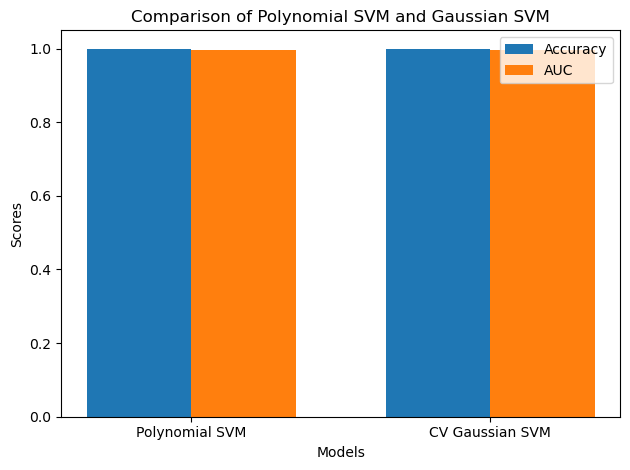

In [21]:
# for the bar
bar_width = 0.35
indices = [0, 1]

# accuracy values
plt.bar(indices, [best_results_p[0], g_test_accuracy], bar_width, label='Accuracy')
# auc values
plt.bar([i + bar_width for i in indices], [best_results_p[1], g_test_auc], bar_width, label='AUC')

# create the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Polynomial SVM and Gaussian SVM')
plt.xticks([i + bar_width / 2 for i in indices], ['Polynomial SVM', 'CV Gaussian SVM'])
plt.legend()
plt.tight_layout()
plt.show()

So, we are done. We have done everything we will do for the project.

Here is bottom part of this project.

## Author

### Mert Kont